# **DL4- Dog vs cat classification using transfer learning**

### **Transfer_Learning**

**Transfer Learning is a Deep Learning technique where we use a pre-trained model. This Pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset**
#### **Transfer Learning gives higher accuracy compared to training models from scratch**

### **Examples of Pre-trained Models:**

* VGG-16
* ResNet50
* inceptionv3
* MobileNet v2



#### WorkFlow

* Dataset ---> image Processing ---> Train Test Split ==> pretrained Mobilenet model ==> new image ==> Mobilenet model trained on dog vs cat data ==>dog vs cat

In [5]:
from zipfile import ZipFile
 
dataset = "C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/test1.zip"

with ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning")
    print("train.zip Extraction Completed")


train.zip Extraction Completed


In [7]:
import os
# counting the number of files in the train folder
path, dirs, files = next(os.walk("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train"))
files_count = len(files)
print("Number of files in train folder:", files_count)

Number of files in train folder: 25000


### Printing the  name of images

In [8]:
file_names = os.listdir("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train")
print(file_names)  # Print first 10 file names

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

## **Importing the Dependencies**

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
from cv2 import imread, resize,imshow,imwrite,cvtColor, COLOR_BGR2RGB
import os

## Displaying the Images of dogs and cats

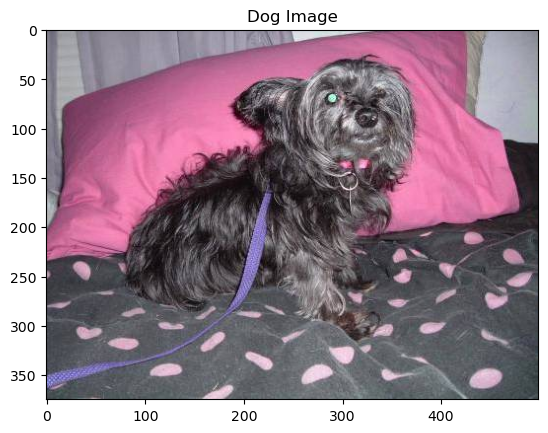

In [12]:
# display dog image
img = mpimg.imread("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train/dog.0.jpg")
plt.imshow(img)
plt.title("Dog Image")
plt.show()

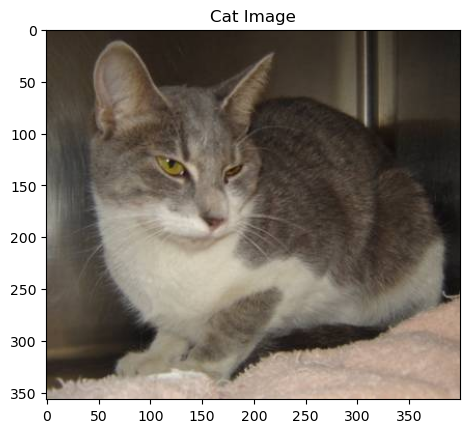

In [13]:
# display the image of cat
img = mpimg.imread("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train/cat.4352.jpg")
plt.imshow(img)
plt.title("Cat Image")
plt.show()

In [14]:
# print 'cat' or 'dog' from first 10 file names
file_name = os.listdir("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train")
for i in range(10):
    name = file_name[i]
    print(name[0:3]) # Print 'cat' or 'dog'

cat
cat
cat
cat
cat
cat
cat
cat
cat
cat


In [15]:
# count number of dog and cat images
file_names = os.listdir("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train")

dog_count = 0
cat_count = 0

for name in file_names:
    name = name[0:3]
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1
print("Number of dog images:", dog_count)
print("Number of cat images:", cat_count)

Number of dog images: 12500
Number of cat images: 12500


## Resizing all the image

In [16]:

import random


original_dir = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train"
resized_dir  = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/resized_images/"

# Get cat and dog file names
cat_files = [f for f in os.listdir(original_dir) if f.startswith("cat")]
dog_files = [f for f in os.listdir(original_dir) if f.startswith("dog")]

# Shuffle to pick random 1000 each
random.shuffle(cat_files)
random.shuffle(dog_files)

cat_files = cat_files[:1000]
dog_files = dog_files[:1000]

# Combine and shuffle for random order
combined_files = cat_files + dog_files
random.shuffle(combined_files)

# Resize and save
for file_name in combined_files:
    img_path = os.path.join(original_dir, file_name)
    img = Image.open(img_path)
    img = img.resize((224, 224)).convert("RGB")
    save_path = os.path.join(resized_dir, file_name)
    img.save(save_path)

print("Saved 1000 cats + 1000 dogs, randomly mixed!")


Saved 1000 cats + 1000 dogs, randomly mixed!


In [ ]:
print("Resizing and saving completed.")

Resizing and saving completed.
